# Training Material Data Extraction

## I. Objective
The primary goal of this notebook is to create a robust data extraction pipeline for deFacto Global, an xP&A software company headquartered in Troy, New York. This pipeline will be used to scrape textual data from the company's training materials. The extracted data will be essential for training and updating their conversational large language model (chatbot).
<br>
As deFacto Global updates its training materials on a quarterly basis, this notebook is designed to facilitate seamless content updates for the company's conversation large language model. By following the procedures outlined here, we can ensure that the chatbot always provides accurate and up-to-date information to users.
<br>
You can learn more about what the company does from its official website: https://defactoglobal.com/

## II. Confidentiality
1. **Important**: Please be aware that this notebook does not contain references to confidential information related to deFacto Global, including login credentials for the company's software and details of their training materials. This information has been masked and hidden from public view.
<br>
2. **Purpose of This Notebook**
This notebook is intended solely for the purpose of demonstrating the data extraction and pipeline creation process. It is **not** intended for any commercial usage, distribution, or unauthorized access to deFacto Global's proprietary information. The primary goal is to showcase the methodology and techniques used in the data extraction process for educational and demonstrative purposes only.
<br>
3. **Responsible Use**
We emphasize the importance of using this notebook responsibly and in compliance with ethical and legal standards. Unauthorized use, sharing, or distribution of confidential information is strictly prohibited. Always respect the privacy and security of sensitive data.

## III. Instructions
1. The program best runs on Jupyter Notebook.
2. Install selenium and BeautifulSoup4 (bs4).
3. Download the latest version of ChromeDriver from https://chromedriver.chromium.org/ , make sure the excutable path is /usr/local/bin/ , our Chrome version is 116.0.5845.110 (Official Build) (x86_64), and the ChromeDriver(Mac) we are using is 116.0.5845.96 (r1160321), from https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/116.0.5845.96/mac-x64/chromedriver-mac-x64.zip
4. Always make sure the chrome driver version matches the the user version of Chrome.

## IV. Scrap Sample Content

In [11]:
# Import packages
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [12]:
# Set options for chrome 
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument('--headless') 
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [13]:
# Create a new instance of the chrome driver
driver = webdriver.Chrome(executable_path = '/usr/local/bin/chromedriver', chrome_options = chrome_options)

# Navigate to the website's login page
driver.get('https://training.defactoglobal.com/dashboard/')

In [14]:
# Find the username and password input fields using ID attributes
username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

# Enter the username and password
username_field.send_keys('xxxx') # Not a real login and password 
password_field.send_keys('yyyy')

# Submit the login form
password_field.submit()

In [15]:
# Wait for the image element to be clickable
image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//img[@src="https://training.defactoglobal.com/wp-content/uploads/2020/04/Course1.png"]')))

# Click on the image
image_element.click()

In [16]:
# Wait for the tab element to be clickable
tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//h5[contains(text(), "General Information")]')))

# Click on the tab
tab_element.click()

In [17]:
# Wait for the page content to load
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))

<selenium.webdriver.remote.webelement.WebElement (session="6f465043a24c10855f92d87fbf82ea76", element="AC58EE3B28B6D39FB8912FEC7E14910C_element_61")>

### a. Scrapping all contents on Tab - General Information

In [18]:
# Get the page source
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape everything on the page
all_elements = soup.find_all()

# Print the scraped elements
#for element in all_elements:
    #print(element)

### b. Scrapping selected contents on Tab - General Information

In [19]:
# Get the page source
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape selected content on the page
all_elements = soup.find('div', class_ = 'entry-content clear')

# Print the scraped elements
#for element in all_elements:
    #print(element)

In [20]:
# Close the driver
driver.quit()

## V. Extraction of All Tabs in Course One
### "deFacto Planning Admin Guide – Modeler"

In [21]:
# Set options for chrome 
chrome_options = Options()
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument('--headless') 
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [22]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('xxxx')
        password_field.send_keys('yyyy')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//img[@src="https://training.defactoglobal.com/wp-content/uploads/2020/04/Course1.png"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "dFModeler Tools")]', 'dFModeler_Tools')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "Application Overview")]', 'Application_Overview')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "Create an Application")]', 'Create an Application')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Export/Import an Application")]', 'Export/Import an Application')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Delete Options")]', 'Delete Options')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Server Settings")]', 'Sever Settings')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Overview")]', 'Dimension Overview')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Types")]', 'Dimension Types')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Members")]', 'Dimension Members')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time

print('The total time to execute the data scraping in first 10 tab is', time_difference_1)

The total time to execute the data scraping in first 10 tab is 87.95452284812927


In [23]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab11_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Hierarchies")]', 'Dimension Hierarchies')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Dimension Properties")]', 'Dimension Properties')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Export/Import Dimensions")]', 'Export/Import Dimensions')
tab14_data = login_and_scrape_tab('//h5[contains(text(), "Delete a Dimension")]', 'Delete a Dimension')
tab15_data = login_and_scrape_tab('//h5[contains(text(), "Model Overview")]', 'Model Overview')
tab16_data = login_and_scrape_tab('//h5[contains(text(), "Deploy Application")]', 'Deploy Application')
tab17_data = login_and_scrape_tab('//h5[contains(text(), "Security Overview")]', 'Security Overview')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Secured Dimensions")]', 'Secured Dimensions')
tab19_data = login_and_scrape_tab('//h5[contains(text(), "Security Roles Overview")]', 'Security Roles Overview')
tab20_data = login_and_scrape_tab('//h5[contains(text(), "Define a Security Role")]', 'Define a Security Role')

end_time = time.time()  # End timing
time_difference_2 = end_time - start_time

print('The total time to execute the data scraping in second 10 tab is', time_difference_2)

The total time to execute the data scraping in second 10 tab is 86.05310106277466


In [24]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab21_data = login_and_scrape_tab('//h5[contains(text(), "Administrator Role")]', 'Administrator Role')
tab22_data = login_and_scrape_tab('//h5[contains(text(), "Business Rules Overview")]', 'Business Rules Overview')
tab23_data = login_and_scrape_tab('//h5[contains(text(), "Dynamic Members")]', 'Dynamic Members')
tab24_data = login_and_scrape_tab('//h5[contains(text(), "On Demand")]', 'On Demand')
tab25_data = login_and_scrape_tab('//h5[contains(text(), "Business Rule Library")]', 'Business Rule Library')
tab26_data = login_and_scrape_tab('//h5[contains(text(), "Automatic")]', 'Automatic')
tab27_data = login_and_scrape_tab('//h5[contains(text(), "Configure FX Translations")]', 'Configure FX Translations')
tab28_data = login_and_scrape_tab('//h5[contains(text(), "FX Business Rules")]', 'FX Business Rules')
tab29_data = login_and_scrape_tab('//h5[contains(text(), "Constant Currency")]', 'Constant Currency')
tab30_data = login_and_scrape_tab('//h5[contains(text(), "Data Locks Overview")]', 'Data Locks Overview')

end_time = time.time()  # End timing
time_difference_3 = end_time - start_time

print('The total time to execute the data scraping in third 10 tab is', time_difference_3)

The total time to execute the data scraping in third 10 tab is 86.66179895401001


In [25]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab31_data = login_and_scrape_tab('//h5[contains(text(), "Configure Data Locks")]', 'Configure Data Locks')
tab32_data = login_and_scrape_tab('//h5[contains(text(), "Lists Overview")]', 'Lists Overview')
tab33_data = login_and_scrape_tab('//h5[contains(text(), "Define a Book Publishing List")]', 'Define a Book Publishing List')
tab34_data = login_and_scrape_tab('//h5[contains(text(), "Define a Workflow List")]', 'Define a Workflow List')
tab35_data = login_and_scrape_tab('//h5[contains(text(), "Create and Use Variables")]', 'Create and Use Variables')
tab36_data = login_and_scrape_tab('//h5[contains(text(), "Using Partitions")]', 'Using Partitions')
tab37_data = login_and_scrape_tab('//h5[contains(text(), "Creating a Workflow")]', 'Creating a Workflow')
tab38_data = login_and_scrape_tab('//h5[contains(text(), "Assignment Task")]', 'Assignment Task')
tab39_data = login_and_scrape_tab('//h5[contains(text(), "Business Rule Task")]', 'Business Rule Task')
tab40_data = login_and_scrape_tab('//h5[contains(text(), "Process Task")]', 'Process Task')

end_time = time.time()  # End timing
time_difference_4 = end_time - start_time

print('The total time to execute the data scraping in last 10 tabs is', time_difference_4)

The total time to execute the data scraping in last 10 tabs is 86.05617785453796


In [26]:
# Calculating the total/average time to scrap all content of this course 
total_time_a = time_difference_1 + time_difference_2  + time_difference_3 + time_difference_4 
average_time_a = (time_difference_1 + time_difference_2  + time_difference_3 + time_difference_4 )/40

# Print it in minutes 
print('The average time to extract each Tab from deFacto Planning Admin Guide – Modeler is', \
      round(average_time_a, 2), "seconds")

The average time to extract each Tab from deFacto Planning Admin Guide – Modeler is 8.67 seconds


In [27]:
# Create a DataFrame
modeler_data = {
"Tab_Name": [tab1_data['Tab_Name'], tab2_data['Tab_Name'], tab3_data['Tab_Name'], tab4_data['Tab_Name'], 
             tab5_data['Tab_Name'], tab6_data['Tab_Name'], tab7_data['Tab_Name'], tab8_data['Tab_Name'], 
             tab9_data['Tab_Name'], tab10_data['Tab_Name'], tab11_data['Tab_Name'], tab12_data['Tab_Name'], 
             tab13_data['Tab_Name'], tab14_data['Tab_Name'], tab15_data['Tab_Name'], tab16_data['Tab_Name'], 
             tab17_data['Tab_Name'], tab18_data['Tab_Name'], tab19_data['Tab_Name'], tab20_data['Tab_Name'],
             tab21_data['Tab_Name'], tab22_data['Tab_Name'], tab23_data['Tab_Name'], tab24_data['Tab_Name'], 
             tab25_data['Tab_Name'], tab26_data['Tab_Name'], tab27_data['Tab_Name'], tab28_data['Tab_Name'], 
             tab29_data['Tab_Name'], tab30_data['Tab_Name'], tab31_data['Tab_Name'], tab32_data['Tab_Name'], 
             tab33_data['Tab_Name'], tab34_data['Tab_Name'], tab35_data['Tab_Name'], tab36_data['Tab_Name'], 
             tab37_data['Tab_Name'], tab38_data['Tab_Name'], tab39_data['Tab_Name'], tab40_data['Tab_Name']]
, 
"Tab_Content": [tab1_data['Tab_Content'], tab2_data['Tab_Content'], tab3_data['Tab_Content'], tab4_data['Tab_Content'], 
             tab5_data['Tab_Content'], tab6_data['Tab_Content'], tab7_data['Tab_Content'], tab8_data['Tab_Content'], 
             tab9_data['Tab_Content'], tab10_data['Tab_Content'], tab11_data['Tab_Content'], tab12_data['Tab_Content'], 
             tab13_data['Tab_Content'], tab14_data['Tab_Content'], tab15_data['Tab_Content'], tab16_data['Tab_Content'], 
             tab17_data['Tab_Content'], tab18_data['Tab_Content'], tab19_data['Tab_Content'], tab20_data['Tab_Content'],
             tab21_data['Tab_Content'], tab22_data['Tab_Content'], tab23_data['Tab_Content'], tab24_data['Tab_Content'], 
             tab25_data['Tab_Content'], tab26_data['Tab_Content'], tab27_data['Tab_Content'], tab28_data['Tab_Content'], 
             tab29_data['Tab_Content'], tab30_data['Tab_Content'], tab31_data['Tab_Content'], tab32_data['Tab_Content'], 
             tab33_data['Tab_Content'], tab34_data['Tab_Content'], tab35_data['Tab_Content'], tab36_data['Tab_Content'], 
             tab37_data['Tab_Content'], tab38_data['Tab_Content'], tab39_data['Tab_Content'], tab40_data['Tab_Content']]
}

# Construct dataframe
df_modeler = pd.DataFrame(modeler_data)
# print(df_modeler)

## VI. Extraction of All Tabs in Course Two
### "deFacto Planning User Guide – Planner"

In [28]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('xxxx')
        password_field.send_keys('yyyy')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/defacto-planning-user-guide-planner/"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "Data Submission")]', 'Data Submission')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "Create an Input Template")]', 'Create an Input Template')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "Comments")]', 'Comments')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Add Suppressed Items")]', 'Add Suppressed Items')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Overview")]', 'Overview')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Clear Data")]', 'Clear Data')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Load Data")]', 'Load Data')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Extract Data")]', 'Extract Data')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Audit Data")]', 'Audit Data')
tab11_data = login_and_scrape_tab('//h5[contains(text(), "Run Business Rules")]', 'Run Business Rules')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Workflow Overview")]', 'Workflow Overview')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Using Workflow")]', 'Using Workflow')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time
    
print('The total time to execute the data scraping in all 13 tabs is', time_difference_1)

The total time to execute the data scraping in all 13 tabs is 112.46830534934998


In [29]:
# Calculating the total/average time to scrap all content of this course 
total_time_b = time_difference_1
average_time_b = time_difference_1 / 13

# Print it in minutes 
print('The average time to extract each Tab from deFacto Planning Admin Guide – Planner is', \
      round(average_time_b, 2), "seconds")

The average time to extract each Tab from deFacto Planning Admin Guide – Planner is 8.65 seconds


In [30]:
# Create a DataFrame
planner_data = {

"Tab_Name": [tab1_data['Tab_Name'], tab2_data['Tab_Name'], tab3_data['Tab_Name'], tab4_data['Tab_Name'], 
             tab5_data['Tab_Name'], tab6_data['Tab_Name'], tab7_data['Tab_Name'], tab8_data['Tab_Name'], 
             tab9_data['Tab_Name'], tab10_data['Tab_Name'], tab11_data['Tab_Name'], tab12_data['Tab_Name'], 
             tab13_data['Tab_Name']]
, 
"Tab_Content": [tab1_data['Tab_Content'], tab2_data['Tab_Content'], tab3_data['Tab_Content'], tab4_data['Tab_Content'], 
             tab5_data['Tab_Content'], tab6_data['Tab_Content'], tab7_data['Tab_Content'], tab8_data['Tab_Content'], 
             tab9_data['Tab_Content'], tab10_data['Tab_Content'], tab11_data['Tab_Content'], tab12_data['Tab_Content'], 
             tab13_data['Tab_Content']]
}

# Construct dataframe
df_planner = pd.DataFrame(planner_data)
#print(df_planner)

## VII. Extraction of All Tabs in Course Three
### "deFacto Planning User Guide – Reporter"

In [31]:
# Design a function that extract data in each tab
def login_and_scrape_tab(tab_xpath, tab_name):

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)

    try:
        # Navigate to the website's login page
        driver.get('https://training.defactoglobal.com/dashboard/')

        # Find the username and password input fields using ID attributes
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

        # Enter the username and password
        username_field.send_keys('xxxx')
        password_field.send_keys('yyyy')

        # Submit the login form
        password_field.submit()

        # Wait for the image element to be clickable and click on it
        image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/defacto-planning-user-guide-reporter/"]')))
        image_element.click()

        # Wait for the tab element to be clickable and click on it
        tab_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, tab_xpath)))
        tab_element.click()

        # Get the page source
        time.sleep(2)  # Add a small delay to ensure the page loads completely
        page_source = driver.page_source

        # Create BeautifulSoup object
        soup = BeautifulSoup(page_source, 'html.parser')

        # Scrape everything on the page
        tab_content = soup.find('div', class_='entry-content clear')

        # Close the WebDriver
        driver.quit()

        return {
            "Tab_Name": tab_name,
            "Tab_Content": tab_content.text.strip()
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        driver.quit()
        return None

# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab1_data = login_and_scrape_tab('//h5[contains(text(), "General Information")]', 'General Information')
tab2_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Ribbon")]', 'deFacto Ribbon')
tab3_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Current View")]', 'deFacto Current View')
tab4_data = login_and_scrape_tab('//h5[contains(text(), "deFacto Tools")]', 'deFacto Tools')
tab5_data = login_and_scrape_tab('//h5[contains(text(), "Report Library – Open Report")]', 'Report Library – Open Report')
tab6_data = login_and_scrape_tab('//h5[contains(text(), "Investigate Data")]', 'Investigate Data')
tab7_data = login_and_scrape_tab('//h5[contains(text(), "Report Designer – Design Report")]', 'Report Designer – Design Report')
tab8_data = login_and_scrape_tab('//h5[contains(text(), "Report Designer – Copy Report")]', 'Report Designer – Copy Report')
tab9_data = login_and_scrape_tab('//h5[contains(text(), "Report Library – Import Report")]', 'Report Library – Import Report')
tab10_data = login_and_scrape_tab('//h5[contains(text(), "Using the Report Designer")]', 'Using the Report Designer')

end_time = time.time()  # End timing
time_difference_1 = end_time - start_time

print('The total time to execute the data scraping in first 10 tabs is', time_difference_1)

The total time to execute the data scraping in first 10 tabs is 93.37719011306763


In [32]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab11_data = login_and_scrape_tab('//h5[contains(text(), "Property Filter Expression")]', 'Property Filter Expression')
tab12_data = login_and_scrape_tab('//h5[contains(text(), "Report Headings")]', 'Report Headings')
tab13_data = login_and_scrape_tab('//h5[contains(text(), "Report Overrides")]', 'Report Overrides')
tab14_data = login_and_scrape_tab('//h5[contains(text(), "Report Formatting")]', 'Report Formatting')
tab15_data = login_and_scrape_tab('//h5[contains(text(), "Report Formulas")]', 'Report Formulas')
tab16_data = login_and_scrape_tab('//h5[contains(text(), "DFX Functions")]', 'DFX Functions')
tab17_data = login_and_scrape_tab('//h5[contains(text(), "Repeater")]', 'Repeater')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Range and Multi-Range")]', 'Range and Multi-Range')
tab18_data = login_and_scrape_tab('//h5[contains(text(), "Range Options")]', 'Range Options')
tab19_data = login_and_scrape_tab('//h5[contains(text(), "Overview")]', 'Overview')
tab20_data = login_and_scrape_tab('//h5[contains(text(), "Book Publish Configuration")]', 'Book Publish Configuration')

end_time = time.time()  # End timing
time_difference_2 = end_time - start_time

print('The total time to execute the data scraping in second 10 tabs is', time_difference_2)

The total time to execute the data scraping in second 10 tabs is 91.89066100120544


In [33]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

tab21_data = login_and_scrape_tab('//h5[contains(text(), "Email Published Book")]', 'Email Published Book')
tab22_data = login_and_scrape_tab('//h5[contains(text(), "Cached Reports")]', 'Cached Reports')
tab23_data = login_and_scrape_tab('//h5[contains(text(), "Using Macros in deFacto")]', 'Using Macros in deFacto')


end_time = time.time()  # End timing
time_difference_3 = end_time - start_time

print('The total time to execute the data scraping in last 3 tabs is', time_difference_3)

The total time to execute the data scraping in last 3 tabs is 25.931597232818604


In [34]:
# Calculating the total/average time to scrap all content of this course 
total_time_c = time_difference_1 + time_difference_2 + time_difference_3
average_time_c = (time_difference_1 + time_difference_2 + time_difference_3) / 23

# Print it in minutes 
print('The average time to extract each Tab from deFacto Planning User Guide – Reporter is', \
      round(average_time_c, 2), "seconds")

The average time to extract each Tab from deFacto Planning User Guide – Reporter is 9.18 seconds


In [35]:
# Create a DataFrame
reporter_data = {

"Tab_Name": [tab1_data['Tab_Name'], tab2_data['Tab_Name'], tab3_data['Tab_Name'], tab4_data['Tab_Name'], 
             tab5_data['Tab_Name'], tab6_data['Tab_Name'], tab7_data['Tab_Name'], tab8_data['Tab_Name'], 
             tab9_data['Tab_Name'], tab10_data['Tab_Name'], tab11_data['Tab_Name'], tab12_data['Tab_Name'], 
             tab13_data['Tab_Name'], tab14_data['Tab_Name'], tab15_data['Tab_Name'], tab16_data['Tab_Name'], 
             tab17_data['Tab_Name'], tab18_data['Tab_Name'], tab19_data['Tab_Name'], tab20_data['Tab_Name'],
             tab21_data['Tab_Name'], tab22_data['Tab_Name'], tab23_data['Tab_Name']]
, 
"Tab_Content": [tab1_data['Tab_Content'], tab2_data['Tab_Content'], tab3_data['Tab_Content'], tab4_data['Tab_Content'], 
             tab5_data['Tab_Content'], tab6_data['Tab_Content'], tab7_data['Tab_Content'], tab8_data['Tab_Content'], 
             tab9_data['Tab_Content'], tab10_data['Tab_Content'], tab11_data['Tab_Content'], tab12_data['Tab_Content'], 
             tab13_data['Tab_Content'], tab14_data['Tab_Content'], tab15_data['Tab_Content'], tab16_data['Tab_Content'], 
             tab17_data['Tab_Content'], tab18_data['Tab_Content'], tab19_data['Tab_Content'], tab20_data['Tab_Content'],
             tab21_data['Tab_Content'], tab22_data['Tab_Content'], tab23_data['Tab_Content']]
}

# Construct dataframe
df_reporter = pd.DataFrame(reporter_data)
#print(df_reporter)

## VIII. Extraction of All Tabs in Course Four (Welcome Course)
### "deFacto Planning TRAINING ENVIRONMENT"

In [36]:
# Function usage:
start_time = time.time() # Calculating the time difference in seconds

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=chrome_options)


# Navigate to the website's login page
driver.get('https://training.defactoglobal.com/dashboard/')

# Find the username and password input fields using ID attributes
username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_login')))
password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'llms_password')))

# Enter the username and password
username_field.send_keys('xxxx')
password_field.send_keys('yyyy')

# Submit the login form
password_field.submit()

# Wait for the image element to be clickable and click on it
image_element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@href="https://training.defactoglobal.com/course/welcome-to-defacto-training/"]')))
image_element.click()

# Wait for the tab content to load
tab_content_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'entry-content')))

# Get the page source
time.sleep(2)  # Add a small delay to ensure the page loads completely
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Scrape everything on the page
tab_content = soup.find('div', class_='entry-content clear')

# Close the WebDriver
driver.quit()

end_time = time.time()  # End timing
time_difference = end_time - start_time

# Calculate total/average time for scrapping this tab
total_time_d = time_difference
average_time_d = time_difference 

# Print it in minutes 
print('The average time to extract each Tab from deFacto Planning Welcome Page is', \
      round(time_difference, 2), "seconds")

The average time to extract each Tab from deFacto Planning Welcome Page is 7.52 seconds


In [37]:
# Create a DataFrame
welcome_data = {
    "Tab_Name": ["Welcome"],
    "Tab_Content": [tab_content]
}

# Construct dataframe
df_welcome = pd.DataFrame(welcome_data)
#print(df_welcome)

## IX. Final Combination and Analysis 

In [38]:
# Combine the DataFrames vertically
combined_df = pd.concat([df_modeler, df_planner, df_reporter, df_welcome], axis=0, ignore_index=True)

#print(combined_df)

In [39]:
# Display the shape of the combined dataframe
combined_df.shape

(77, 2)

In [40]:
# Save the DataFrame to a CSV file
csv_filename = 'raw_data.csv'
combined_df.to_csv(csv_filename, index = False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to raw_data.csv


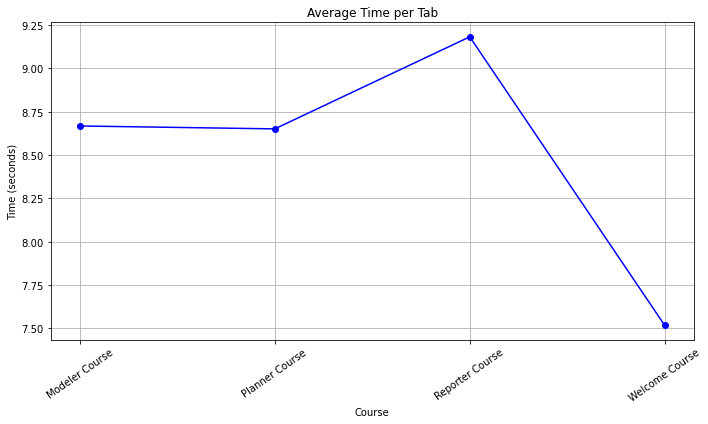

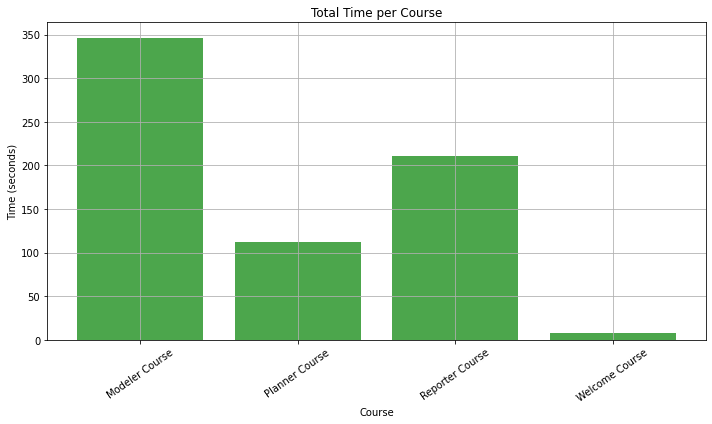

            Course  Average Time per Tab  Total Time per Course
0   Modeler Course              8.668140             346.725601
1   Planner Course              8.651408             112.468305
2  Reporter Course              9.182585             211.199448
3   Welcome Course              7.517605               7.517605


In [41]:
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'Course': ['Modeler Course', 'Planner Course', 'Reporter Course', 'Welcome Course'],
    'Average Time per Tab': [average_time_a, average_time_b, average_time_c, average_time_d],
    'Total Time per Course': [total_time_a, total_time_b, total_time_c, total_time_d]
}
df = pd.DataFrame(data)

# Create a line graph for Average Time per Tab
plt.figure(figsize = (10, 6))
plt.plot(df['Course'], df['Average Time per Tab'], marker = 'o', color = 'blue')
plt.title('Average Time per Tab')
plt.xlabel('Course')
plt.ylabel('Time (seconds)')
plt.xticks(rotation = 35)
plt.grid(True)
plt.tight_layout()

# Save the line graph as an image (optional)
plt.savefig('average_time_per_tab.png')

# Show the line graph
plt.show()

# Create a bar plot for Total Time per Course
plt.figure(figsize = (10, 6))
plt.bar(df['Course'], df['Total Time per Course'], color = 'green', alpha = 0.7)
plt.title('Total Time per Course')
plt.xlabel('Course')
plt.ylabel('Time (seconds)')
plt.xticks(rotation = 35)
plt.grid(True)
plt.tight_layout()

# Save the bar plot as an image (optional)
plt.savefig('total_time_per_course.png')

# Show the bar plot
plt.show()

# Display the DataFrame
print(df)